# Read the data into gapminder

In [1]:
gapminder <- read.csv("data/gapminder-FiveYearData.csv")

# Plotting with ggplot 

ggplot2 is (one of) the most popular plotting packages in R

ggplot2 is built on the grammar of graphics, the idea that any plot can be 
expressed from the same set of components: 

 * a data set, 
 * a coordinate system, and 
 * a set of geoms–the visual representation of data points.

Think that we are building a graph in layers.

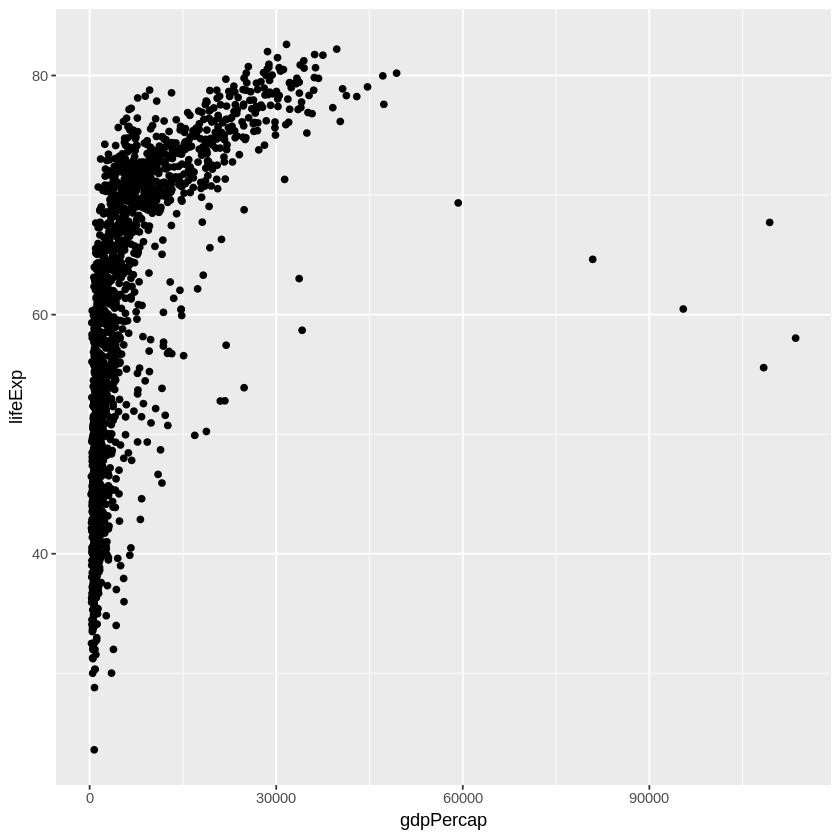

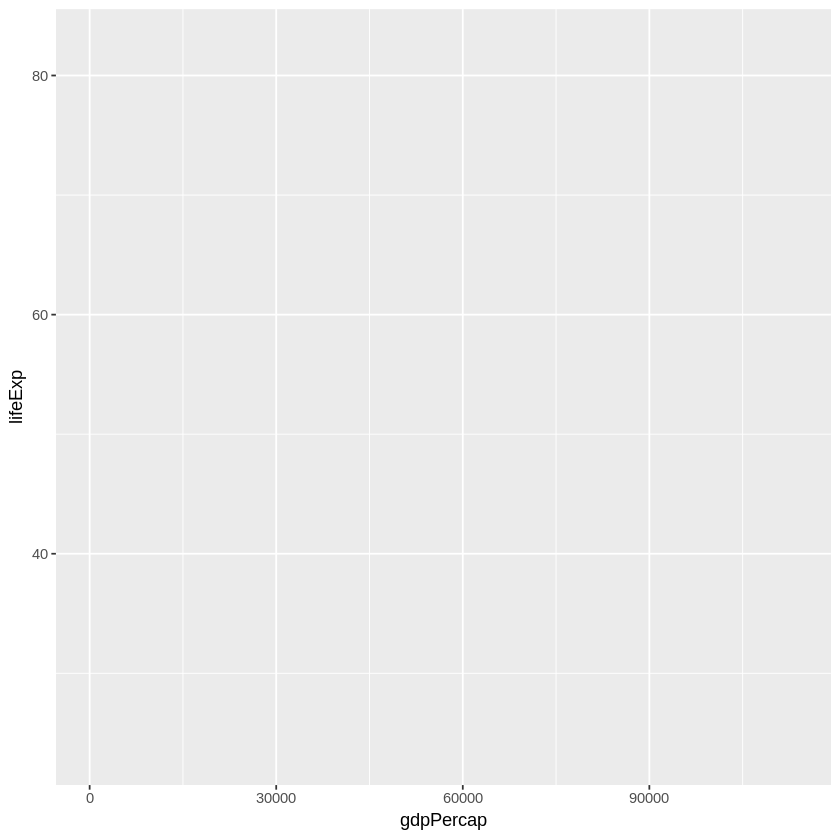

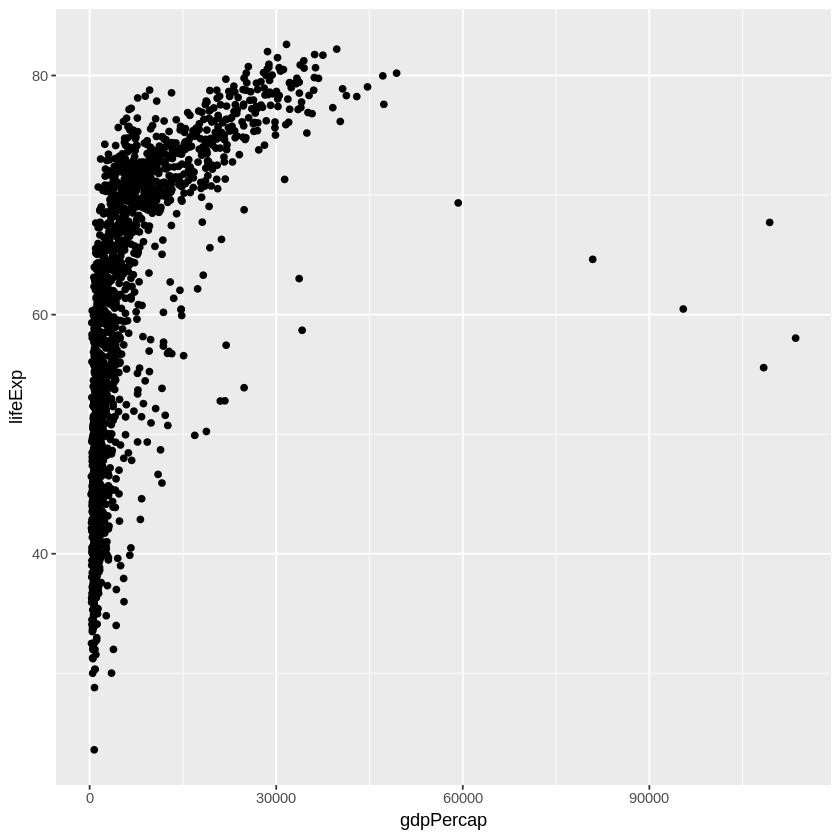

In [2]:
# Load the ggplot2 package
library(ggplot2)

# Plotting the lifeExp against  the gdpPercap 
# Note: the "+" must always be at the end of the line.
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

# Breaking this down"
# Base layer
(g <-  ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)))
# Data is the gapminder dataframe
# Aestethics are give in the aes term. These apply globally.
# x and y point to column names in the data frame.

# Next stage is to add a geom. Use points in this case,
# to produce a scatter plot.
g + geom_point()


# Challenge 1

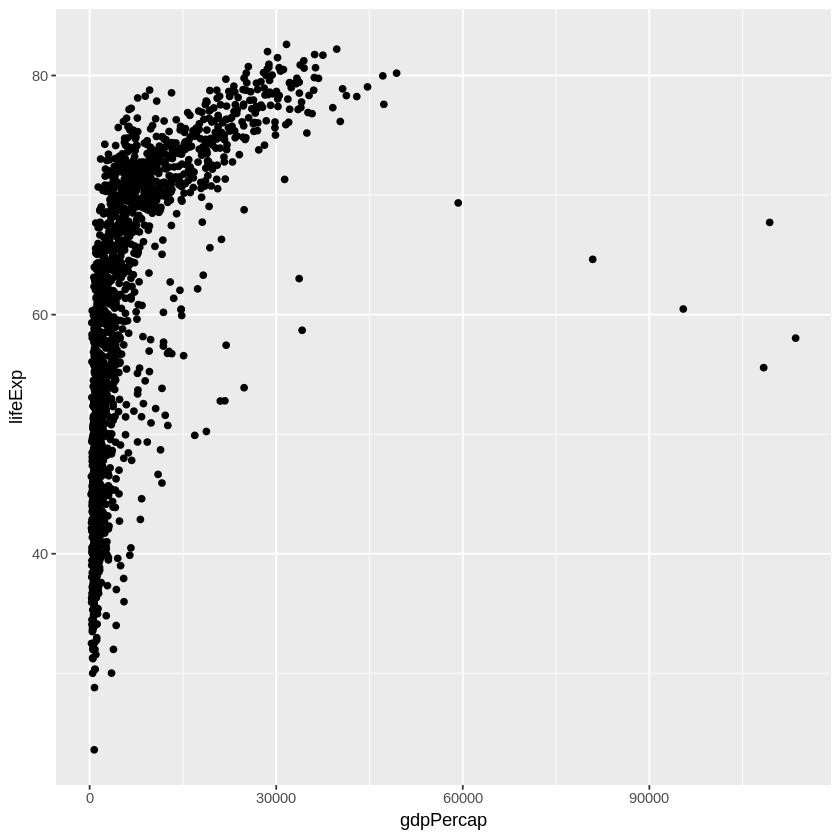

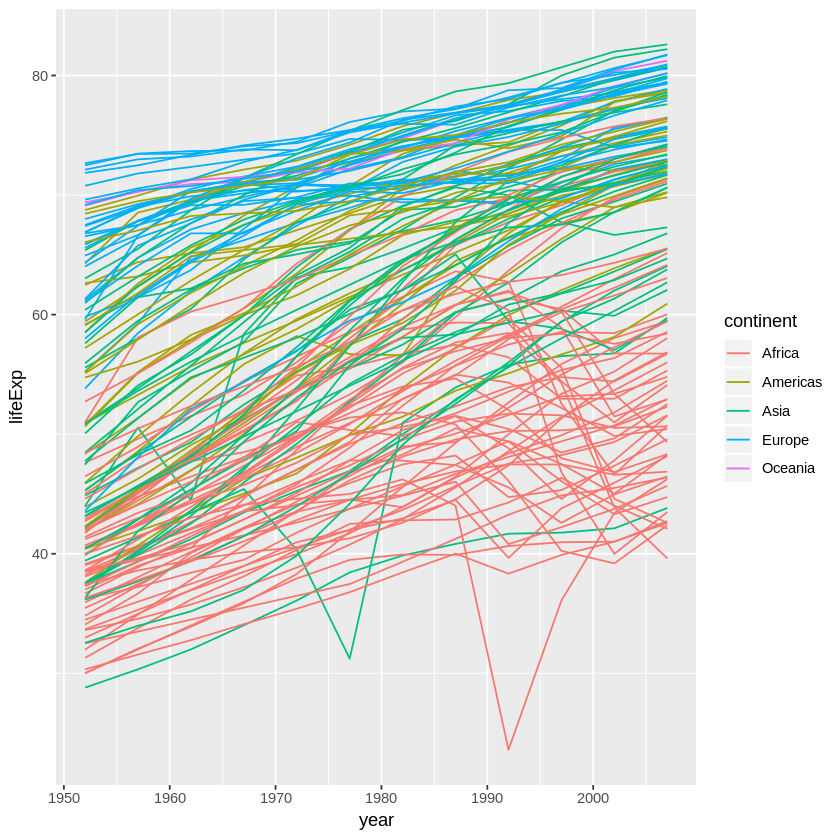

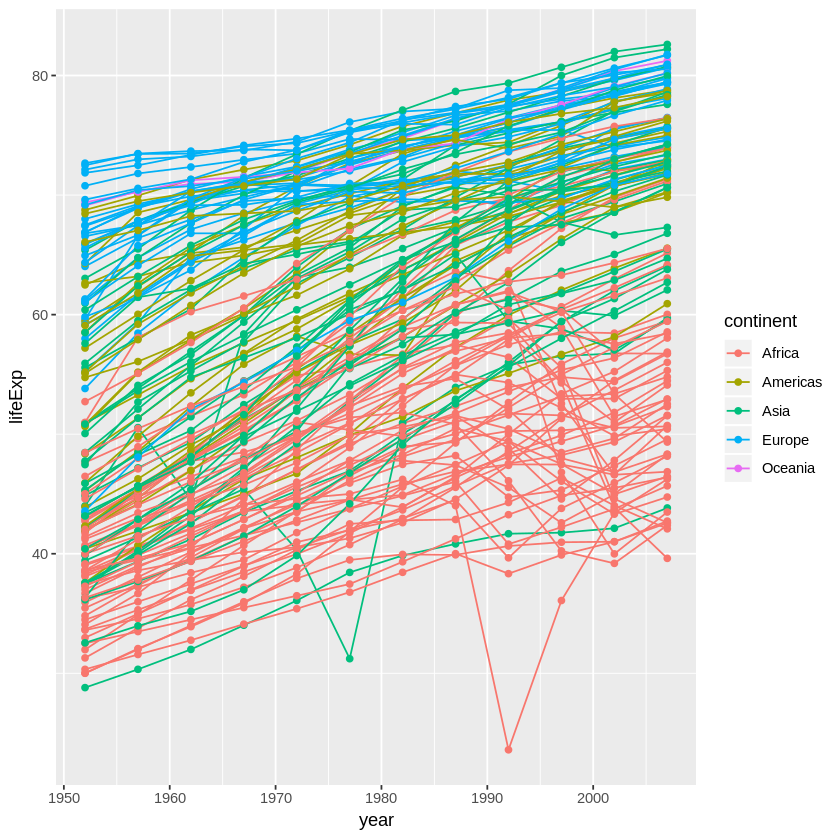

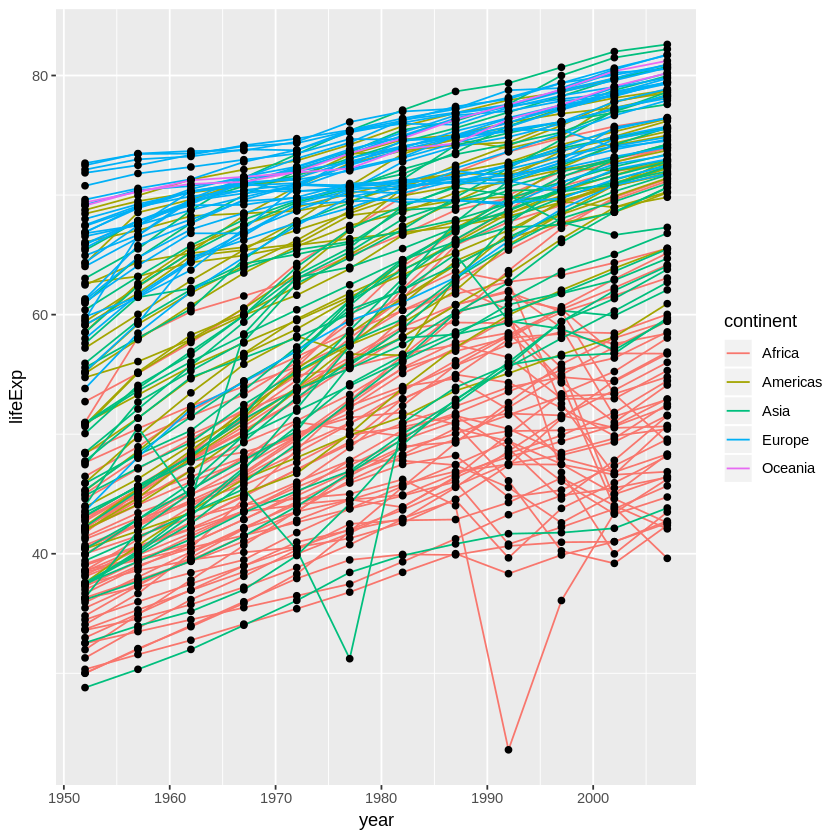

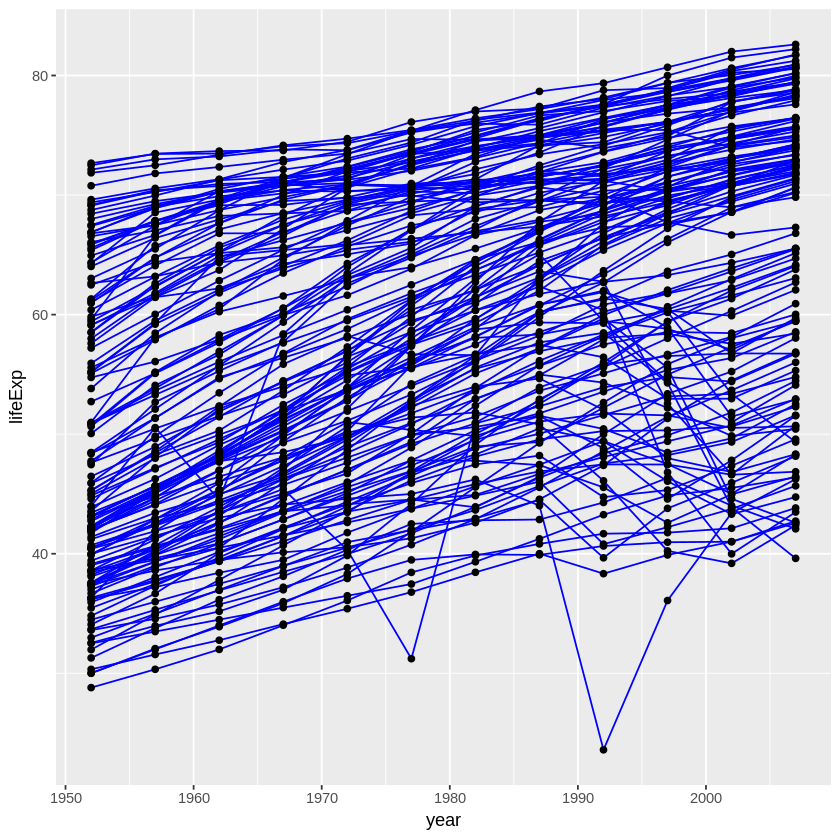

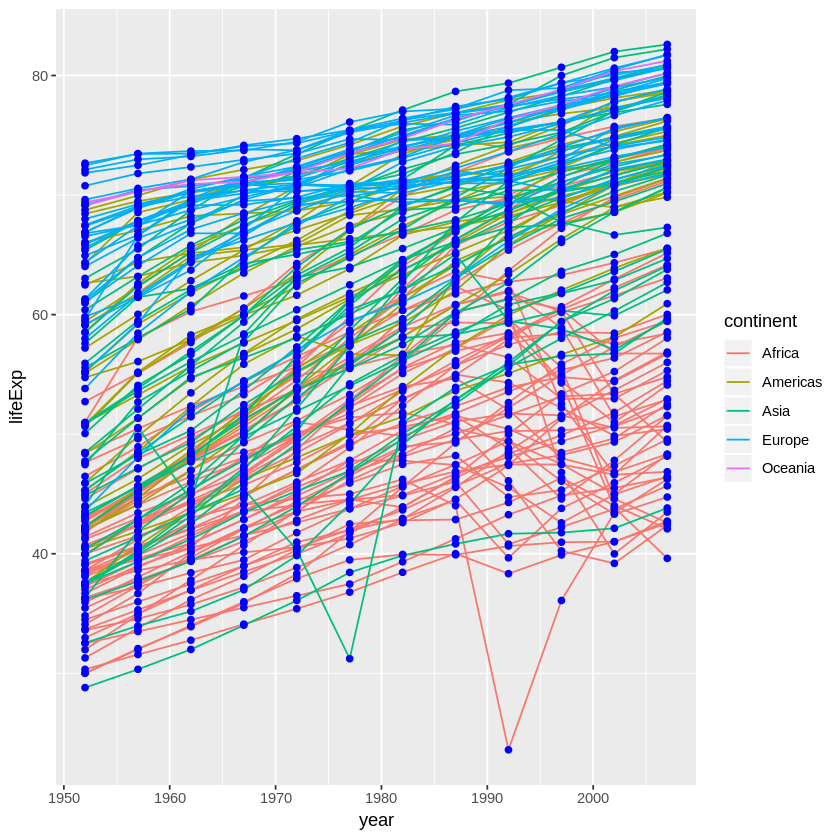

In [3]:
# 1.1 Modify the example so that the figure shows how life expectancy has 
#     changed over time:

ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) + geom_point()

# Hint: the gapminder dataset has a column called “year”, which should 
#       appear on the x-axis.

# 1.2 In the previous examples and challenge we’ve used the aes function to 
#     tell the scatterplot geom about the x and y locations of each point. 
#     Another aesthetic property we can modify is the point colour. Modify 
#     the code from the previous challenge to color the points by the 
#     “continent” column. What trends do you see in the data? 
#     Are they what you expected?

# NB ggplot2 will accept either British or American spelling, e.g. colour vs color.

# Layers ------------------------------------------------------------------

# Using a line plot
# Notethat we have added a "by=country" this tells ggplot to plot a line by
# country.
ggplot(data = gapminder, aes(x=year, y=lifeExp, by=country, colour=continent)) +
  geom_line()

# Using both lines and points
ggplot(data = gapminder, aes(x=year, y=lifeExp, by=country, colour=continent)) +
       geom_line() + 
      geom_point()  # Points drawn on top of lines

# Show this by taking the colour out of the global to a local option
ggplot(data = gapminder, aes(x=year, y=lifeExp, by=country)) +
       geom_line(aes(colour=continent)) + 
       geom_point()

# Using aesthetic as a mapping to a variable in the data, e.g. colour
# or geom_line(aes(colour=continent)), ggplot will give a different color 
# to each continent. If you wanted to do a change to all lines you would
# use geom_line(colour="blue")
ggplot(data = gapminder, aes(x=year, y=lifeExp, by=country)) +
  geom_line(color="blue") + 
  geom_point()

# or just for the points
ggplot(data = gapminder, aes(x=year, y=lifeExp, by=country)) +
  geom_line(aes(colour=continent)) + 
  geom_point(colour="blue")

# Challenge 2

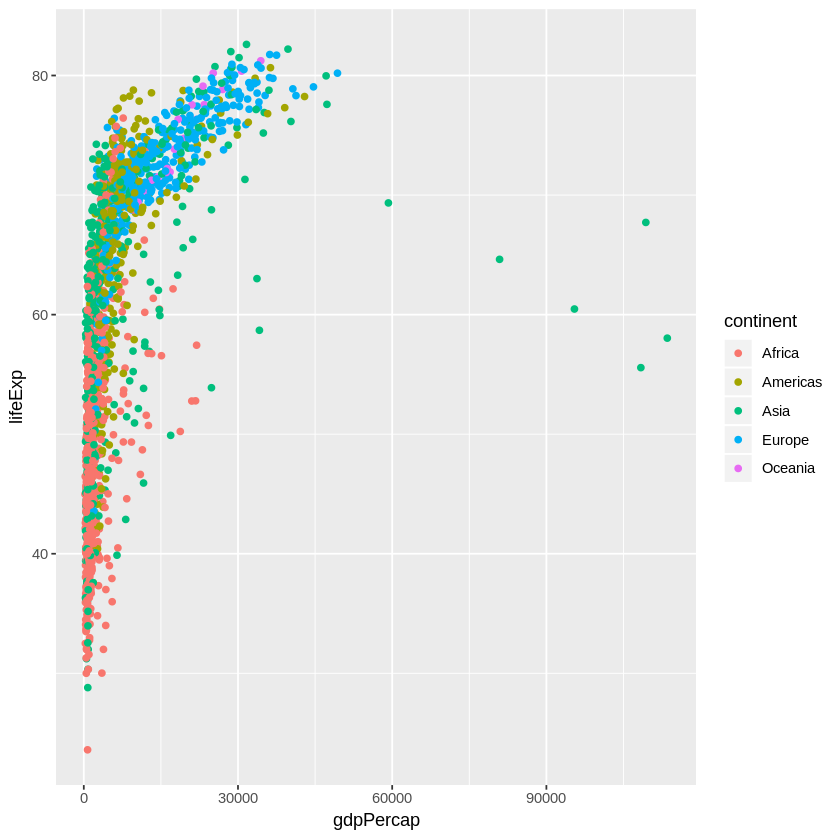

Warning message:
“Using alpha for a discrete variable is not advised.”

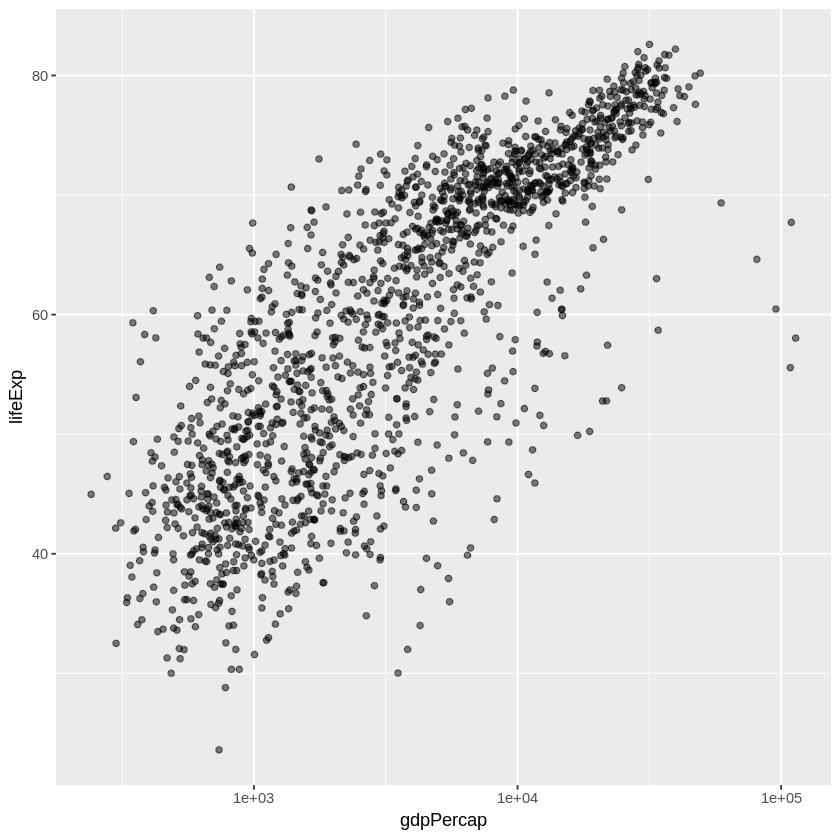

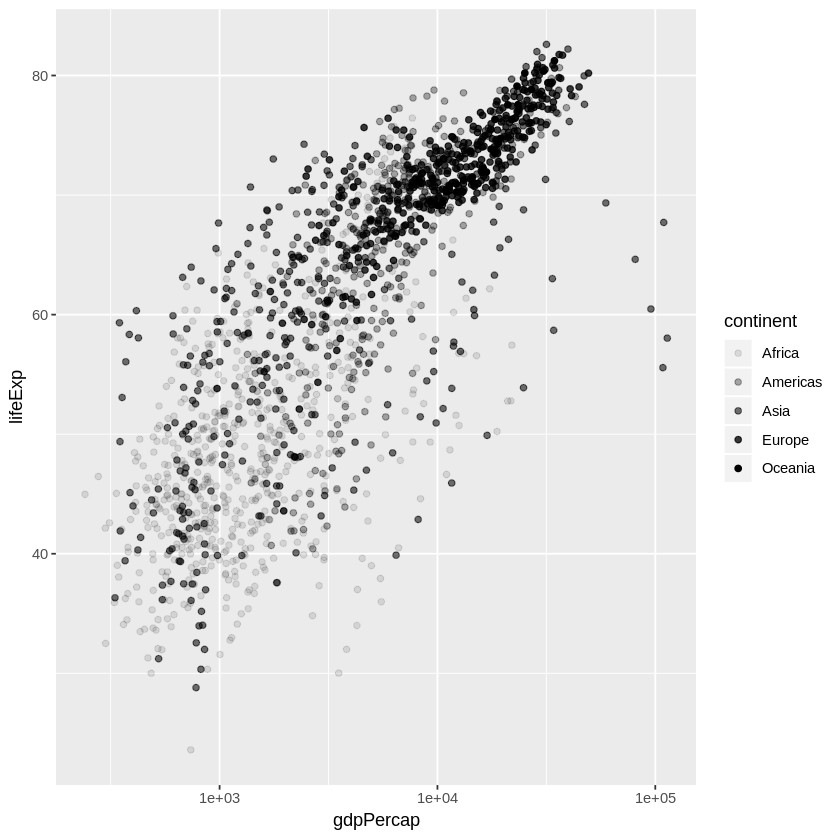

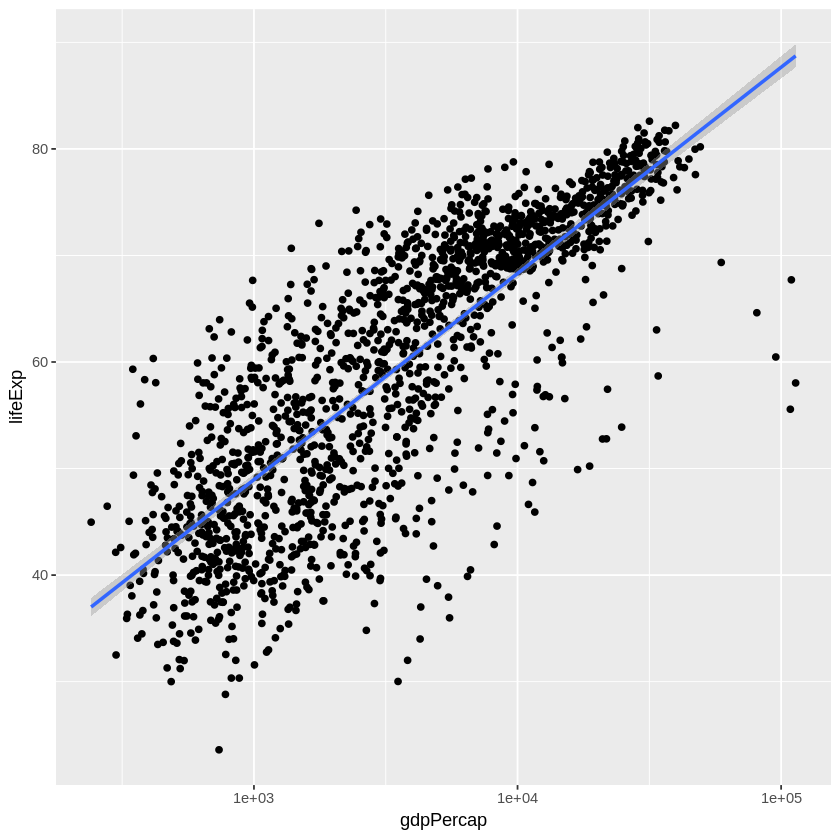

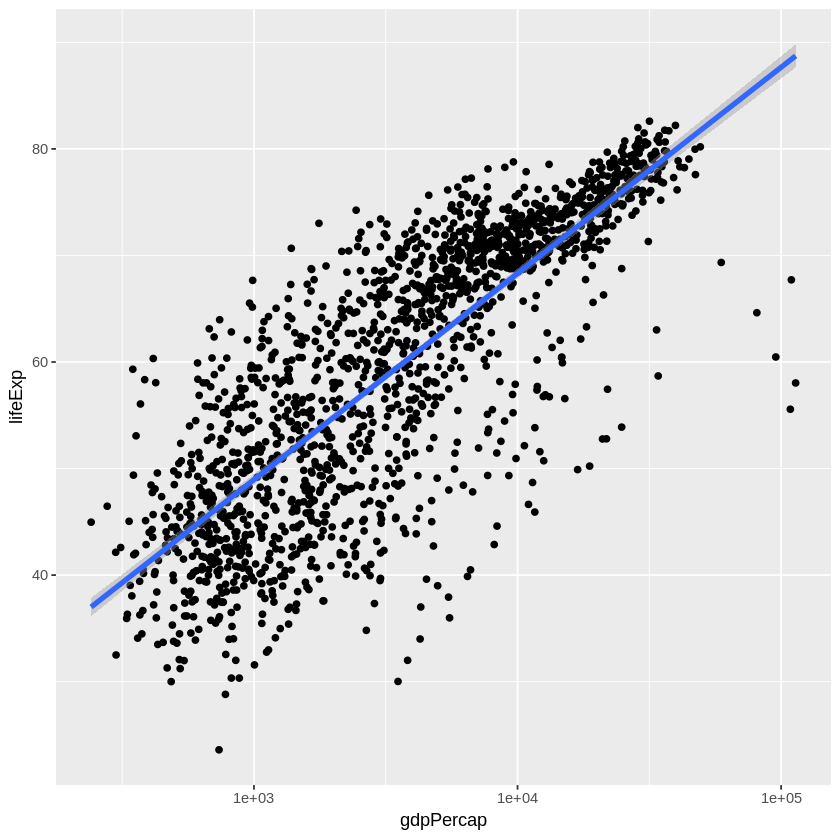

In [4]:

# 2.1 Switch the order of the point and line layers from the previous example. 
#     What happened? i.e. points before lines

# 2.2 Look at the ggplot documentation to see how to:
#     1. Add a plot title (ggtitle)
#     2. Add an x and y axis lable (xlab,ylab)

# Transformations and statistics ------------------------------------------
# 
# Can overlay statistics on to our models.

# Going back to the first plot.
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp, color=continent)) +
  geom_point()

# Difficult to see the relationship between points: 
# 
# - Have GDP per capita outliers (compresses the view of the data)
# - Plots being plotted over each other.
#
# To try and improve things:
#
# - Change the scale of the axis using the scale functions
# - Make the points semi transparent using alpha
#
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
      geom_point(alpha = 0.5) + 
      scale_x_log10()

# x-axis are now increasing in powers of 10.
# Note also that alpha has been applied outside an aes setting so
# it applies to all points.
# Can apply it as an aesthetic mapping: geom_point(aes(alpha = continent))
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
      geom_point(aes(alpha = continent)) + 
      scale_x_log10()

# Fit a simple relationship (linear model - "lm") to the data by adding 
# another layer, geom_smooth:
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
       geom_point() + 
       scale_x_log10() + 
       geom_smooth(method="lm")

# If we wanted to make the line thicker
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
      geom_point() + 
      scale_x_log10() + 
      geom_smooth(method="lm", size=1.5)

# Here we set the size aesthetic by passing it as an argument to geom_smooth. 
# Previously in the lesson we’ve used the aes function to define a mapping 
# between data variables and their visual representation.

# Challenge 3


[1] "0"

[1] "01"

[1] "89"

[1] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
  [19] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
  [37] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
  [55] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
  [73] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "B" "B" "B" "B" "B" "B"
  [91] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
 [109] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
 [127] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
 [145] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
 [163] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
 [181] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
 [199] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
 [217] "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C"
 [235] "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C"
 [253] "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C"
 [271] "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C"
 [289] "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C"
 [307] "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C"
 [325] "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C"
 [343] "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C"
 [361] "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C"
 [379] "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C"
 [397] "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "D" "D" "D" "D" "D" "D"
 [415] "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D"
 [433] "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "E" "E" "E" "E" "E" "E"
 [451] "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E"
 [469] "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E"
 [487] "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E"
 [505] "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "F" "F" "F" "F" "F" "F"
 [523] "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F"
 [541] "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G"
 [559] "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G"
 [577] "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G"
 [595] "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G"
 [613] "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G"
 [631] "G" "G" "G" "G" "G" "G" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H"
 [649] "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H"
 [667] "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H"
 [685] "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I"
 [703] "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I"
 [721] "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I"
 [739] "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I"
 [757] "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I" "I"
 [775] "I" "I" "I" "I" "I" "I" "J" "J" "J" "J" "J" "J" "J" "J" "J" "J" "J" "J"
 [793] "J" "J" "J" "J" "J" "J" "J" "J" "J" "J" "J" "J" "J" "J" "J" "J" "J" "J"
 [811] "J" "J" "J" "J" "J" "J" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K"
 [829] "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K"
 [847] "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K" "K"
 [865] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"
 [883] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"
 [901] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE

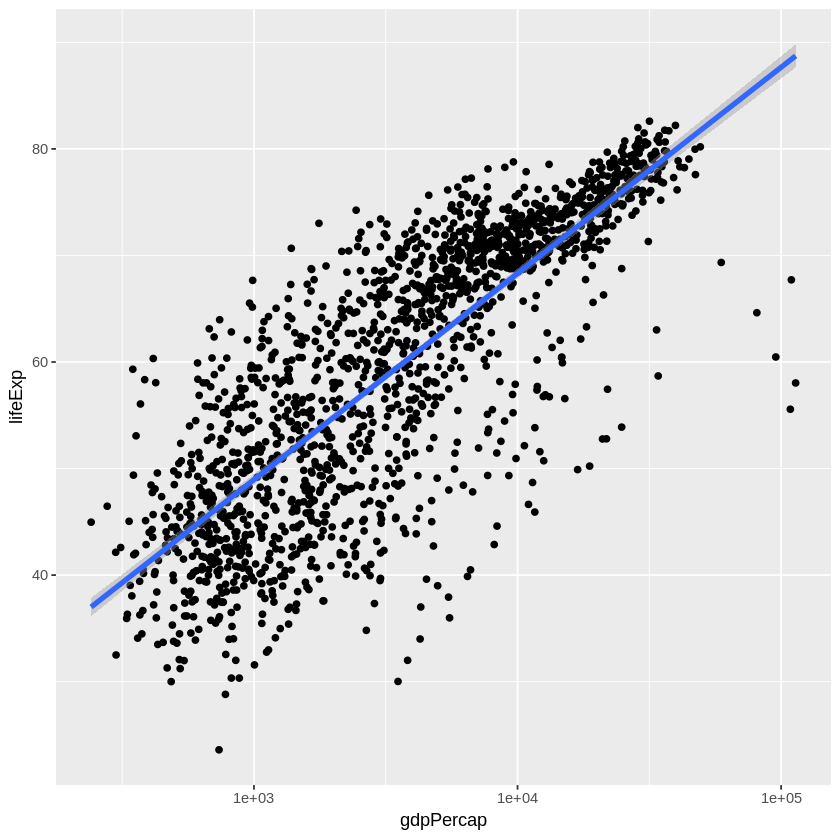

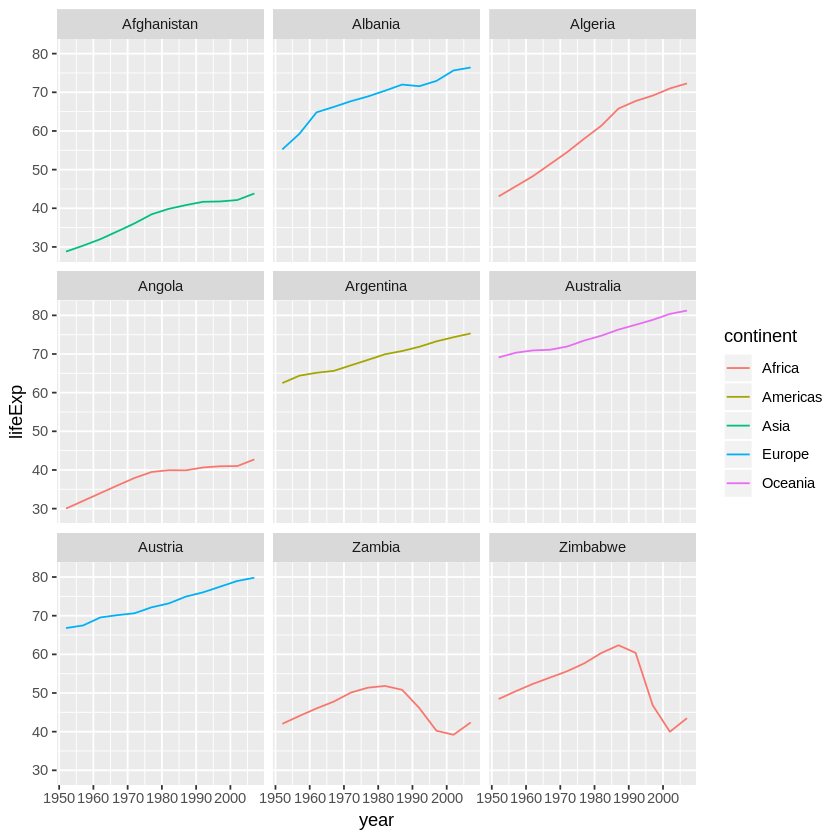

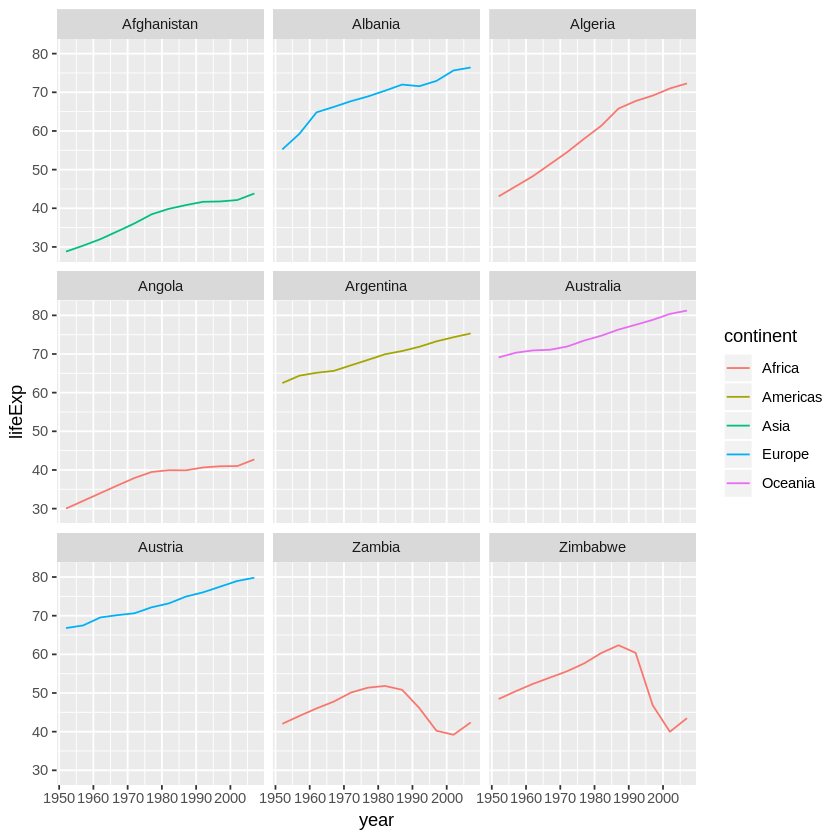

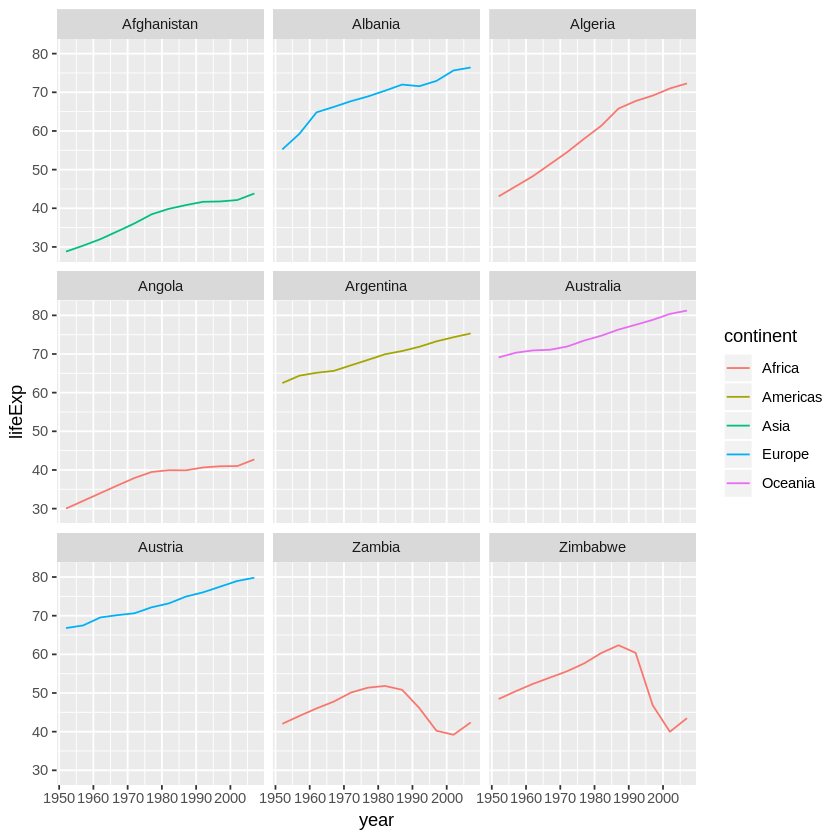

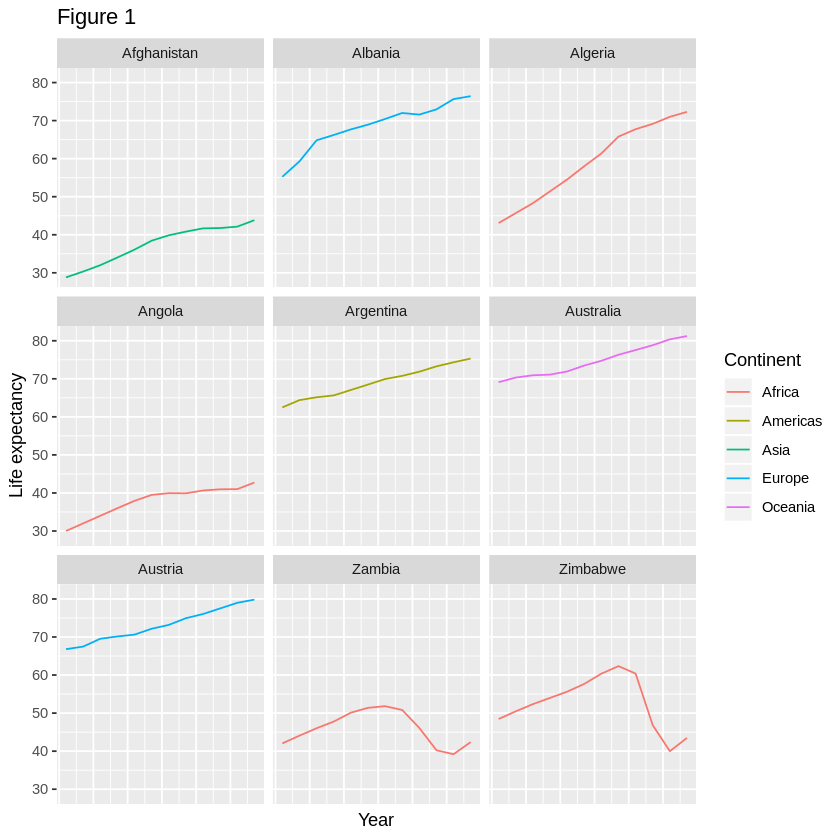

In [5]:

# 3.1 Modify the color and size of the points on the point layer in the 
#   previous example. Change the colour of the line.
#   Hint: do not use the aes function.
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
      geom_point() + 
      scale_x_log10() + 
     geom_smooth(method="lm", size=1.5)

# 3.1 Modify your solution to the previous exercise so that the points are now 
#     a different shape and are colored by continent with new trendlines. 
#     Hint: The color argument can be used inside the aesthetic.

# Multi-panel figures -----------------------------------------------------

# Instead of specifying differences in one plot (through colour or marker type)
# we can split the differences into different plots. Use facet panels to do this.

# Going to use the substr() function that allows you to snip bits of a string:
z <- "0123456789"
substr(z,start=1,stop=1)
substr(z,start=1,stop=2)
substr(z,start=nchar(z)-1,stop=nchar(z))

# We are going to use this to create an auxilary vector to filter the data (otherwise
# there will be too many plot windows).
(starts.with <- substr(gapminder$country, start = 1, stop = 1))

# The operator %in% allows us to make multiple comparisons rather than write out 
# long subsetting conditions (in this case, starts.with %in% c("A", "Z") is equivalent 
# to starts.with == "A" | starts.with == "Z")
head(starts.with %in% c("A", "Z"),100)

# Create another data frame
az.countries <- gapminder[starts.with %in% c("A", "Z"), ]

# Now do the plotting:
ggplot(data = az.countries, aes(x = year, y = lifeExp, color=continent)) +
      geom_line() + 
      facet_wrap( ~ country)

# Incidentally we did not to create the data frame - we could have done
# the filtering directly (but harder to read)
ggplot(data = gapminder[starts.with %in% c("A", "Z"),], aes(x = year, y = lifeExp, color=continent)) +
       geom_line() + 
       facet_wrap( ~ country)

# The facet_wrap layer took a “formula” as its argument, denoted by the tilde (~). 
# This tells R to draw a panel for each unique value in the country column of the 
# gapminder dataset.


# Modifying text ----------------------------------------------------------

# Clean up the figure for publication:
ggplot(data = az.countries, aes(x = year, y = lifeExp, color=continent)) +
       geom_line() + 
       facet_wrap( ~ country)

# We need to change some of the text elements:
#
#  * the x-axis is too cluttered and needs to be labelled
#  * the y axis should read “Life expectancy”, rather than the 
#    column name in the data frame.
#
# Use the theme layer to:
#    controls the axis text, 
#    overall text size, 
#
# there are special layers for changing the axis labels. 
# To change the legend title, we need to use the scales layer.

ggplot(data = az.countries, aes(x = year, y = lifeExp, color=continent)) +
      geom_line() + 
      facet_wrap( ~ country) +
      xlab("Year") +                                # x-axis label
      ylab("Life expectancy") +                     # y-axis label
      ggtitle("Figure 1") +                         # title
      scale_colour_discrete(name="Continent") +     # legend title
      theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())


# Rstudio ggplot2 cheat sheet:
#
#   http://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf
#


# Challenge 4

In [6]:
# 4.1 Create a density plot of GDP per capita, filled by continent.
#     Once you have a plot add an alpha value. What difference do you
#     observe if you add an alpha value inside or outside the aes
#     parameters?

  
# 4.2 Advanced: Transform the x axis to better visualise the data spread.


# 4.3 Advanced: Add a facet layer to panel the density plots by year.